# Setting up the problem

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
from shapely.geometry import Point
from pyvis.network import Network

In [3]:
# Importing the dataset
file_path= 'FWP Example Realistic.xlsx'
dataset = pd.read_excel(file_path)

In [4]:
dataset.columns

Index(['jv_ID', 'areaName', 'sectionID', 'locFrom', 'locTo', 'lane',
       'info_area_m2', 'info_jv_latitude', 'info_jv_longitude',
       'info_surf_class', 'info_urban_rural', 'Treatment_2022',
       'Treatment_2023', 'Treatment_2024', 'Treatment_2025', 'Treatment_2026',
       'Treatment_2027', 'Treatment_2028', 'Treatment_2029', 'Treatment_2030',
       'Treatment_2031', 'Treatment_2032', 'Treatment_2033', 'Treatment_2034',
       'Treatment_2035', 'Treatment_2036', 'Treatment_2037', 'Treatment_2038',
       'Treatment_2039', 'Treatment_2040', 'Treatment_2041'],
      dtype='object')

In [5]:
dataset['xy'] = [Point(xy) for xy in zip(dataset['info_jv_longitude'], dataset['info_jv_latitude'])]

In [6]:
dataset

,jv_ID,areaName,sectionID,locFrom,locTo,lane,info_area_m2,info_jv_latitude,info_jv_longitude,info_surf_class,...,Treatment_2033,Treatment_2034,Treatment_2035,Treatment_2036,Treatment_2037,Treatment_2038,Treatment_2039,Treatment_2040,Treatment_2041,xy
0,292036,AARON PLACE_8_id_1094,1094,8,127,All,785.4,-37.694304,176.128057,ac,...,NaN,NaN,NaN,NaN,NaN,NaN,ChipSeal,NaN,NaN,POINT (176.1280568353 -37.6943036104)
1,292037,AARON PLACE HAMMERHEAD_0_id_1095,1095,0,50,All,365.0,-37.694977,176.127427,ac,...,NaN,ChipSeal,NaN,NaN,NaN,NaN,NaN,NaN,ChipSeal,POINT (176.1274272514 -37.6949769895)
2,292038,AARON PLACE HAMMERHEAD_80_id_1095,1095,80,113,All,267.3,-37.695154,176.128164,ac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChipSeal,NaN,POINT (176.1281643499 -37.6951544738)
3,292039,AARON PLACE RAB_0_id_1362,1362,0,53,All,307.4,0.000000,0.000000,ac,...,NaN,ThinAC_SR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (0 0)
4,292040,ABELIA AVENUE_18_id_1028,1028,18,67,All,367.5,-37.682016,176.237100,ac,...,ChipSeal,NaN,NaN,NaN,NaN,NaN,NaN,ChipSeal,NaN,POINT (176.2370996109 -37.6820159691)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,295630,YORK AVENUE_13_id_678,678,13,200,All,2187.9,-37.656198,176.191476,ac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (176.1914760698 -37.6561980495)
3595,295631,YORK AVENUE_200_id_678,678,200,247,All,549.9,-37.656219,176.192837,ac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (176.1928372892 -37.6562189938)
3596,295632,ZACHARY PLACE_4_id_1122,1122,4,54,All,280.0,-37.735845,176.184094,ac,...,NaN,NaN,NaN,NaN,NaN,NaN,ChipSeal,NaN,NaN,POINT (176.1840940985 -37.7358451161)
3597,295633,ZAPOTE PLACE_3_id_977,977,3,97,All,526.4,-37.752167,176.162370,seal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (176.1623697705 -37.7521670801)


In [7]:
#ditance between two points based on longitude and latitude
def distance(lat1, lon1, lat2, lon2):
    
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*atan2(sqrt(a), sqrt(1-a))
    distance = R*c
    return distance

In [92]:
#checking the treatments that would happen within one kilometer of each other using distance function
#using 
def plot_graph(dataset):
    G = nx.Graph()
    j_1=0
    for i in range(len(dataset)):
        G.add_node(str(dataset['jv_ID'][i]),label=str(dataset['jv_ID'][i]),title=str(dataset['jv_ID'][i]))
        j_1=j_1+1
    for i in range(len(dataset)):
        for j in range(len(dataset)):
            if i != j:
                if distance(dataset['info_jv_latitude'][i], dataset['info_jv_longitude'][i], dataset['info_jv_latitude'][j], dataset['info_jv_longitude'][j]) <= 1:
                    G.add_edge(str(dataset['jv_ID'][i]),str(dataset['jv_ID'][j]))
                    
                
            
                
    pos = nx.get_node_attributes(G, 'pos')
    nt = Network('500px', '500px')
    nt.from_nx(G)
    nt.show_buttons(filter_=['physics'])
    #nx.draw(G,node_size=0.2)#with_labels=True)
    nt.show('nx.html',notebook=False)

In [93]:
#checking the treatments that would happen within one kilometers of each other using distance function
plot_graph(dataset.head(100))

nx.html


In [10]:
G = nx.Graph()

In [15]:
G.add_node(1)
G.add_node(2)
G.add_edge(1,2)

In [50]:
nx.draw(G)

NameError: name 'G' is not defined

In [69]:
!pip install pyvis

     -------------------------------------- 756.0/756.0 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 40.7/40.7 kB 951.4 kB/s eta 0:00:00


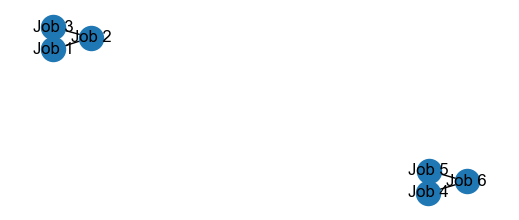

In [20]:
graph_to_show= nx.Graph()
graph_to_show.add_node("Job 1",label="Job 1",title="Job 1")
graph_to_show.add_node("Job 2",label="Job 2",title="Job 2")
graph_to_show.add_node("Job 3",label="Job 3",title="Job 3")
graph_to_show.add_node("Job 4",label="Job 4",title="Job 4")
graph_to_show.add_node("Job 5",label="Job 5",title="Job 5")
graph_to_show.add_node("Job 6",label="Job 6",title="Job 6")


graph_to_show.add_edge("Job 1","Job 2",label="Compatible")
graph_to_show.add_edge("Job 2","Job 3")
graph_to_show.add_edge("Job 3","Job 1")
graph_to_show.add_edge("Job 4","Job 5")
graph_to_show.add_edge("Job 5","Job 6")
graph_to_show.add_edge("Job 6","Job 4")
#graph_to_show.add_edge("Job 3","Job 4")

plt.figure(figsize=(5,2))
#pos = nx.get_node_attributes(graph_to_show, 'pos')

nx.draw(graph_to_show,with_labels=True)

In [ ]:
#creating a compatability graph for the treatments
def create_graph(dataset):
    G = nx.Graph()
    j_1=0
    for i in range(len(dataset)):
        G.add_node(str(dataset['jv_ID'][i]),label=str(dataset['jv_ID'][i]),title=str(dataset['jv_ID'][i]))
        j_1=j_1+1
    for i in range(len(dataset)):
        for j in range(len(dataset)):
            for k in range(years):
                if i != j:
                    if dataset['info_jv_year'][i] == dataset['info_jv_year'][j]:
                        if distance(dataset['info_jv_latitude'][i], dataset['info_jv_longitude'][i], dataset['info_jv_latitude'][j], dataset['info_jv_longitude'][j]) <= 1:
                            G.add_edge(str(dataset['jv_ID'][i]),str(dataset['jv_ID'][j]))
            if i != j:
                if distance(dataset['info_jv_latitude'][i], dataset['info_jv_longitude'][i], dataset['info_jv_latitude'][j], dataset['info_jv_longitude'][j]) <= 1:
                    G.add_edge(str(dataset['jv_ID'][i]),str(dataset['jv_ID'][j]))
                    
                
            
                
    pos = nx.get_node_attributes(G, 'pos')
    return G

In [ ]:
#iterating over all the years in 'Treatment_2022', 'Treatment_2023', 'Treatment_2024', 'Treatment_2025', 'Treatment_2026','Treatment_2027', 'Treatment_2028', 'Treatment_2029', 'Treatment_2030','Treatment_2031', 'Treatment_2032', 'Treatment_2033', 'Treatment_2034', 'Treatment_2035', 'Treatment_2036', 'Treatment_2037', 'Treatment_2038', 'Treatment_2039', 'Treatment_2040', 'Treatment_2041' and see which treatments are compatible with each other
years = 20
for i in range(years):
    graph_to_show = create_graph(dataset)
    plt.figure(figsize=(5,2))
    nx.draw(graph_to_show,with_labels=True)
    plt.savefig('graph_'+str(i)+'.png')
    plt.close()

In [10]:
import networkx as nx
from pyvis.network import Network

def plot_compatible_treatments_graph(dataset):
    G = nx.Graph()

    # Add nodes for each treatment
    treatments_columns = [col for col in dataset.columns if col.startswith('Treatment_')]
    for treatment_col in treatments_columns:
        for i in range(len(dataset)):
            treatment_year = int(treatment_col.split('_')[1])
            treatment_id = f"{dataset['jv_ID'][i]}_{treatment_year}"
            G.add_node(treatment_id, label=treatment_id, title=treatment_id)

    # Add edges for compatible treatments
    for i in range(len(dataset)):
        for j in range(len(dataset)):
            if i != j:
                for treatment_col in treatments_columns:
                    treatment_year_i = int(treatment_col.split('_')[1])
                    treatment_year_j = int(treatment_col.split('_')[1])
                    # Check if the treatments are within 1 km and 3 years of each other
                    if (
                        distance(dataset['info_jv_latitude'][i], dataset['info_jv_longitude'][i],
                                 dataset['info_jv_latitude'][j], dataset['info_jv_longitude'][j]) <= 1
                        and abs(treatment_year_i - treatment_year_j) <= 3
                    ):
                        treatment_id_i = f"{dataset['jv_ID'][i]}_{treatment_year_i}"
                        treatment_id_j = f"{dataset['jv_ID'][j]}_{treatment_year_j}"
                        G.add_edge(treatment_id_i, treatment_id_j)

    # Create a Network object
    nt = Network('500px', '500px')
    nt.from_nx(G)
    nt.show_buttons(filter_=['physics'])
    nt.show('compatible_treatments_graph.html', notebook=False)

# Define or import the 'distance' function

# Call the plot_compatible_treatments_graph function with your dataset



In [14]:
plot_compatible_treatments_graph(dataset.head(100))

compatible_treatments_graph.html


In [15]:
import networkx as nx
from pyvis.network import Network
import numpy as np
from rtree import index

def build_spatial_index(dataset):
    idx = index.Index()
    for i, row in dataset.iterrows():
        idx.insert(i, (row['info_jv_longitude'], row['info_jv_latitude'], row['info_jv_longitude'], row['info_jv_latitude']))
    return idx

def plot_compatible_treatments_graph(dataset):
    G = nx.Graph()

    # Build a spatial index for efficient geographical searches
    spatial_index = build_spatial_index(dataset)

    # Add nodes for each treatment using itertuples
    treatments_columns = [col for col in dataset.columns if col.startswith('Treatment_')]
    for row in dataset.itertuples():
        for treatment_col in treatments_columns:
            treatment_year = int(treatment_col.split('_')[1])
            treatment_id = f"{row.jv_ID}_{treatment_year}"
            G.add_node(treatment_id, label=treatment_id, title=treatment_id)

    # Add edges for compatible treatments using spatial indexing
    for i, row_i in enumerate(dataset.itertuples()):
        for j in spatial_index.intersection((row_i.info_jv_longitude - 1, row_i.info_jv_latitude - 1,
                                              row_i.info_jv_longitude + 1, row_i.info_jv_latitude + 1)):
            row_j = dataset.iloc[j]
            if i != j:
                for treatment_col in treatments_columns:
                    treatment_year_i = int(treatment_col.split('_')[1])
                    treatment_year_j = int(treatment_col.split('_')[1])
                    # Check if the treatments are within 1 km and 3 years of each other
                    if (
                        distance(row_i.info_jv_latitude, row_i.info_jv_longitude,
                                 row_j.info_jv_latitude, row_j.info_jv_longitude) <= 1
                        and abs(treatment_year_i - treatment_year_j) <= 3
                    ):
                        treatment_id_i = f"{row_i.jv_ID}_{treatment_year_i}"
                        treatment_id_j = f"{row_j.jv_ID}_{treatment_year_j}"
                        G.add_edge(treatment_id_i, treatment_id_j)

    # Create a Network object
    nt = Network('500px', '500px')
    nt.from_nx(G)
    nt.show_buttons(filter_=['physics'])
    nt.show('compatible_treatments_graph.html', notebook=False)

# Define or import the optimized 'distance' function

# Call the plot_compatible_treatments_graph function with your dataset



In [ ]:
plot_compatible_treatments_graph(dataset)